# Time Series Analysis with Deep Learning 
Time series analysis is an approach to analyze time series data to extract meaningful characteristics of data and generate other useful insights applied in business situation. 
### Steps in the process
- Preprocessing
- Define neural network shape and Model Compilation
- Fit Model
- Evaluation
- Visualize prediction
### Models
- DNNs
- RNNs
- LSTM
### Comparing Models

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))

In [2]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
import warnings
warnings.filterwarnings('ignore')
import dvc.api

### Custom library

In [5]:
from utility import ReadData
from  Preprocessing import dataPreprocess
# from logger import App_Logger
from data_info import DataInfo
import plotfunction
import util as u

In [7]:
# this train data contains the merged data and versioned with DVC
def get_data(tag, 
            path='data/train.csv', 
            repo ='C:/Users/Ekubay/Documents/Rossmann_Pharmaceutical_sales_Prediction'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [93]:
df_train = get_data('ver_4')

In [21]:
df_tests = get_data('ver_3')

In [94]:
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


In [95]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'Dates', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'SalesperCustomer'],
      dtype='object')

**need to extract**
- weekdays
- weekends 
- number of days to holidays
- Number of days after holiday
- Beginning of month, mid month and ending of month
(think of more features to extract), extra marks for it


In [134]:
train_df = df_train.copy()

In [136]:
train_df['Dates'] = pd.to_datetime(train_df['Dates'])

In [137]:
train_df['weekdays'] = train_df['Dates'].dt.weekday + 1

In [138]:
train_df['weekdays'].head()

0    5
1    4
2    3
3    2
4    1
Name: weekdays, dtype: int64

In [139]:
# weekend
train_df['Weekends'] = train_df['Dates'].dt.weekday + 1

In [141]:
train_df['Weekends'] = train_df['Weekends'].mask(train_df['Weekends'].values >= 6, 0)

In [142]:
train_df[['weekdays','Weekends']].head()

,weekdays,Weekends
0,5,5
1,4,4
2,3,3
3,2,2
4,1,1


In [154]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'Dates', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'SalesperCustomer', 'weekdays', 'Weekends'],
      dtype='object')

In [160]:
#train_df.query('Weekends == 0')

In [158]:
train_df.Weekends.dtypes

dtype('int64')

In [ ]:
#StateHoliday, SchoolHoliday

### Number of days to holydays 

In [ ]:
train_df[]

In [49]:
df_tests.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_tests.

In [16]:
df_train['Dates'].head()

0    2015-07-31
1    2015-07-30
2    2015-07-29
3    2015-07-28
4    2015-07-27
Name: Dates, dtype: object

In [50]:
df_train['Dates'] = pd.to_datetime(df_train['Dates'])

In [25]:
df_tests['Date'] = pd.to_datetime(df_tests['Date'])

In [20]:
df_train['Dates'].dtypes

dtype('<M8[ns]')

### Model 1: DNN
A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers — from Wiki

How to apply DNN for time-series data? The key idea here: we consider time-series as linear model: {X(i) …X(i+t)}~Y(i+t+1). In the format, it shows using t steps input time-series to predict the next step which is Y(i+t+1).

### Step 1: Data Preprocessing
Import a helper function of convert2matrix to reshape dataset in order to create 2-D input shape of DNN. A full connected net — the main difference between RNN or LTSM

In [92]:
sales_df = df_train[['Date', 'Sales']].set_index('Dates')
sales_df.head()

KeyError: "['Date'] not in index"

In [51]:
def convert2matrix(data_arr, look_back):
    X,Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X), np.array(Y)

**Split data set into testing dataset and train dataset**

In [52]:
train_size = 1000
train, test =df_train.values[0:train_size,:],df_train.values[train_size:len(df_train.values),:]
# setup look_back window 
look_back = 30
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [87]:
trainY.shape

(970,)

### Step 2: Define neural network shape and compile model
I built a very simple DNN with only one hidden layer.

In [53]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=5, input_dim=look_back, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

### Step 3: Fit Model

In [54]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, SimpleRNN

In [62]:
trainX = trainX.astype(int)
trainY = trainY.astype(int)
testX = testX.astype(int)
testY = testY.astype(int)

In [63]:
model=model_dnn(look_back)

history=model.fit(trainX, trainY, epochs=10, batch_size=30, verbose=1, 
                  validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', 
                                                                         patience=10)], shuffle=False)

Epoch 1/10
33/33 [==============================] - 48s 1s/step - loss: 0.4141 - mse: 0.4141 - mae: 0.6027 - val_loss: 33088.2422 - val_mse: 33088.2422 - val_mae: 157.6599
Epoch 2/10
33/33 [==============================] - 33s 1s/step - loss: 0.0187 - mse: 0.0187 - mae: 0.0813 - val_loss: 1371.6803 - val_mse: 1371.6803 - val_mae: 32.0838
Epoch 3/10
33/33 [==============================] - 36s 1s/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0532 - val_loss: 1640.3204 - val_mse: 1640.3204 - val_mae: 35.0875
Epoch 4/10
33/33 [==============================] - 37s 1s/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0402 - val_loss: 1939.0865 - val_mse: 1939.0865 - val_mae: 38.1513
Epoch 5/10
33/33 [==============================] - 55s 2s/step - loss: 0.0110 - mse: 0.0110 - mae: 0.0401 - val_loss: 1786.2552 - val_mse: 1786.2552 - val_mae: 36.6166
Epoch 6/10
33/33 [==============================] - 78s 2s/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0404 - val_loss: 1735.4348 - val_mse: 1735.4348 - 

### Step 4: Model evaluation

In [64]:
 def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

31756/31756 [==============================] - 28s 811us/step
Train Root Mean Squared Error(RMSE): 0.10; Train Mean Absolute Error(MAE) : 0.03 
Test Root Mean Squared Error(RMSE): 37.40; Test Mean Absolute Error(MAE) : 32.41 


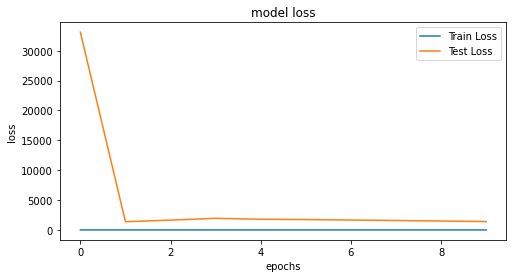

In [68]:
train_score = model.evaluate(trainX, trainY, verbose=0)
test_predict = model.predict(testX)

print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

**Print out error metrics and generate model loss plot.**

From the graph above, obviously we overfitted our model since the model almost didn’t do anything after 40 epochs.

In [84]:
test_predict.shape

(1016179, 1)

### Step 5. Visualizing Prediction

In [76]:
  def prediction_plot(testY, test_predict):
        len_prediction=[x for x in range(len(testY))]
        plt.figure(figsize=(8,4))
        plt.plot(len_prediction, testY[:1], marker='.', label="actual")
        #plt.plot(len_prediction, test_predict[:1], 'r', label="prediction")
        plt.tight_layout()
        sns.despine(top=True)
        plt.subplots_adjust(left=0.07)
        plt.ylabel('sales', size=15)
        plt.xlabel('dates', size=15)
        plt.legend(fontsize=15)
        plt.show();

ValueError: x and y must have same first dimension, but have shapes (1016179,) and (1,)

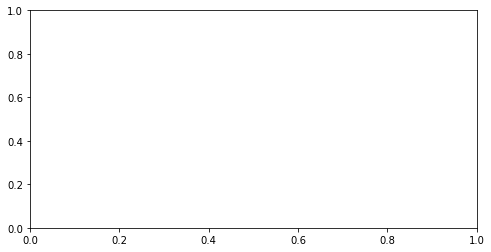

In [77]:
prediction_plot(testY, test_predict)

**From the plot, even though it misses some peaks and troughs, but it’s able to capture the overall trends and seasonality without any parameter tuning or normalization preprocessing.**

## Model 2: RNN
RNN(Recurrent Neural Network) handles sequences which is different from a fully connected DNN showed previously.

The key idea here: time-series datasets are sequences.

### Step 1: Data Preprocessing
- RNN input shape: (batch_size, window size, input_features)
- Import helper function to create matrix

### Step 2: Define neural network shape and compile model

Built a RNN model with two hidden layers.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
def model_rnn(look_back):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(1,look_back), activation="relu"))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

### Step 3: Fit Model

In [ ]:
model=model_rnn(look_back)

history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX,testY),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

### Step 4: Model Evaluation
Print out error metrics and generate model loss plot.

In [ ]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(mean_squared_error(trainY, train_predict[:,0])), mean_absolute_error(trainY, train_predict[:,0])))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
      % (np.sqrt(mean_squared_error(testY, test_predict[:,0])), mean_absolute_error(testY, test_predict[:,0])))
model_loss(history)

### Step 5. Visualizing Prediction

In [ ]:
def prediction_plot(testY, test_predict,look_back):
    len_prediction=[x for x in range(len(testY)-look_back)]
    plt.plot(len_prediction, testY[:l], marker='.', label="actual")
    plt.plot(len_prediction, test_predict[:l], 'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Ads Daily Spend', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show()

**In general, the prediction looks good with a smaller test errors. Even though it misses some peaks and troughs, but it’s able to capture the overall trends and seasonality.**

In [90]:
import tensorflow_addons as tfa

ModuleNotFoundError: No module named 'tensorflow_addons'

In [89]:
# model RNN
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
import tensorflow_addons as tfa


# Builds the RNN model.
def build_model(input_shape, layers, show_summary=True):
    model = Sequential()
    model.add(Input(shape=input_shape))
    for layer in layers:
        model.add(layer)

    model.compile(optimizer=tfa.optimizers.Yogi(learning_rate=0.001), loss='huber')

    if show_summary:
        model.summary()

    return model


# Fits the data into RNN.
def train(model, name, x_train, y_train, epochs=200, batch_size=32):
    checkpoint = ModelCheckpoint(filepath='weights/' + name + '_callback.h5',
                                 monitor='loss',
                                 mode='min',
                                 save_best_only=True,
                                 verbose=1)
    early_stopping = EarlyStopping(monitor='loss',
                                   min_delta=0,
                                   patience=25,
                                   verbose=1,
                                   restore_best_weights=True)

    model_callbacks = [checkpoint, early_stopping]

    history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, callbacks=model_callbacks, verbose=1)
    return model, history

ModuleNotFoundError: No module named 'tensorflow_addons'